# Gradient Descent

Epoch 0, Loss: 0.28730811279078095
Epoch 1000, Loss: 0.2512873153726783
Epoch 2000, Loss: 0.24399728698863699
Epoch 3000, Loss: 0.2389491349570118
Epoch 4000, Loss: 0.23430194168196167
Epoch 5000, Loss: 0.22909377677781398
Epoch 6000, Loss: 0.22266791381478507
Epoch 7000, Loss: 0.2144808645680652
Epoch 8000, Loss: 0.20409992704536506
Epoch 9000, Loss: 0.19130553985893736
Epoch 10000, Loss: 0.17622057218966736


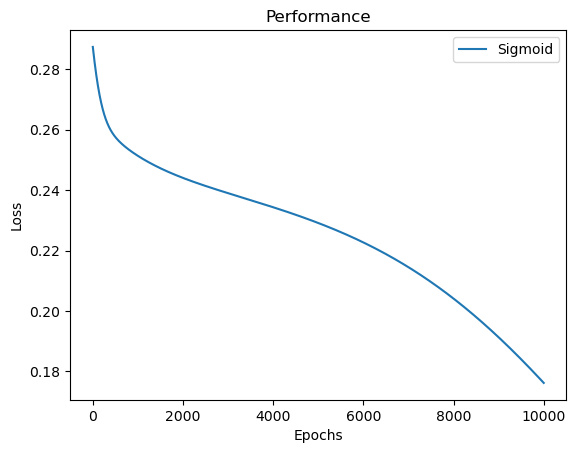

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def initialize_weights(input_size, hidden_size, output_size):
    np.random.seed(42)
    weights_input_hidden = np.random.randn(input_size, hidden_size)
    weights_hidden_output = np.random.randn(hidden_size, output_size)
    return weights_input_hidden, weights_hidden_output

def forward_propagation(inputs, weights_input_hidden, weights_hidden_output):
    hidden_layer_input = np.dot(inputs, weights_input_hidden)
    hidden_layer_output = sigmoid(hidden_layer_input)

    output_layer_input = np.dot(hidden_layer_output, weights_hidden_output)
    output_layer_output = sigmoid(output_layer_input)

    return hidden_layer_output, output_layer_output

def calculate_loss(targets, predictions):
    return np.mean((targets - predictions) ** 2)

def backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                         weights_input_hidden, weights_hidden_output, learning_rate):
    output_error = targets - output_layer_output
    output_delta = output_error * sigmoid_derivative(output_layer_output)

    hidden_layer_error = output_delta.dot(weights_hidden_output.T)
    hidden_layer_delta = hidden_layer_error * sigmoid_derivative(hidden_layer_output)

    weights_hidden_output += hidden_layer_output.T.dot(output_delta) * learning_rate
    weights_input_hidden += inputs.T.dot(hidden_layer_delta) * learning_rate

def train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs):
    input_size = inputs.shape[1]
    weights_input_hidden, weights_hidden_output = initialize_weights(input_size, hidden_size, output_size)
    loss_history =[]
    for epoch in range(epochs+1):

        hidden_layer_output, output_layer_output = forward_propagation(inputs, weights_input_hidden, weights_hidden_output)

        backward_propagation(inputs, targets, hidden_layer_output, output_layer_output,
                             weights_input_hidden, weights_hidden_output, learning_rate)

        loss = calculate_loss(targets, output_layer_output)
        loss_history.append(loss)
        if epoch % 1000 == 0:
            print(f"Epoch {epoch}, Loss: {loss}")

    return loss_history

inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
targets = np.array([[0], [1], [1], [0]])

hidden_size = 10
output_size = 1
learning_rate = 0.01
epochs = 10000

loss_history = train_neural_network(inputs, targets, hidden_size, output_size, learning_rate, epochs)

plt.plot(loss_history,label="Sigmoid")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Performance")
plt.legend()
plt.show()